<a href="https://colab.research.google.com/github/pdcos/IA376_K/blob/main/Trabalho_1/seeds_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IA376 - Trabalho 1

####Aluno: Pedro Luís Azevedo Costa
####RA: 175857

# 1 - Base de dados

A base de dados escolhida (disponível no link abaixo) foi um dataset contendo dados referentes as características 210 sementes, sendo elas pertencentes a 3 espécies - Kama, Rosa e Kanadian (Códigos 1, 2 e 3, respectivamente). cada espécie possui exatamente 30 amostras.

- https://archive.ics.uci.edu/ml/datasets/seeds


In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering


## 1.1 - Atributos

O dataset possui 7 atributos:
- Área (EN: Area)
- Perímetro (EN: Perimeter)
- Compacidade (EN: Compactness)
- Comprimento do Núcleo (EN: Length of Kernel)
- Largura do Núcleo (EN: Width of Kernel)
- Coeficiente de Assimetria (EN: Asymmetry Coefficient)
- Largura do Sulco do Núcleo (EN: Length of Kernel Groove)


In [ ]:
headers = ["Area", "Perimeter", "Compactness", "Length", "Width", "Asymmetry", "Groove", "Class"]
seeds_df = pd.read_csv("seeds_dataset.txt", sep="\s+", names=headers)
seeds_df.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# 2 - Objetivos

O objetivo deste experimento é utilizar agrupamento hierárquico paraencontrar a relacao com a maior precisao possível para classificar as sementes em especies.

O estudo dos dados foi feito sem nenhum conhecimento prévio em botanica, portanto os atributos utilizdos foram selecionados conforme desempenho em testes e análise exploratória.

# 3 - Análise Exploratória



## 3.1 - Histogramas

Abaixo temos os histogramas de cada um dos 7 atributos do dataset. Pode-se perceber que alguns gráficos tem um formato que mesmo que minimamente se assemelha a uma distribuicao gaussiana (como é o caso de "Compactness" e "Asymmetry"). Outros parecem ter multiplos picos, sugerindo uma distribuicao multivariada. 

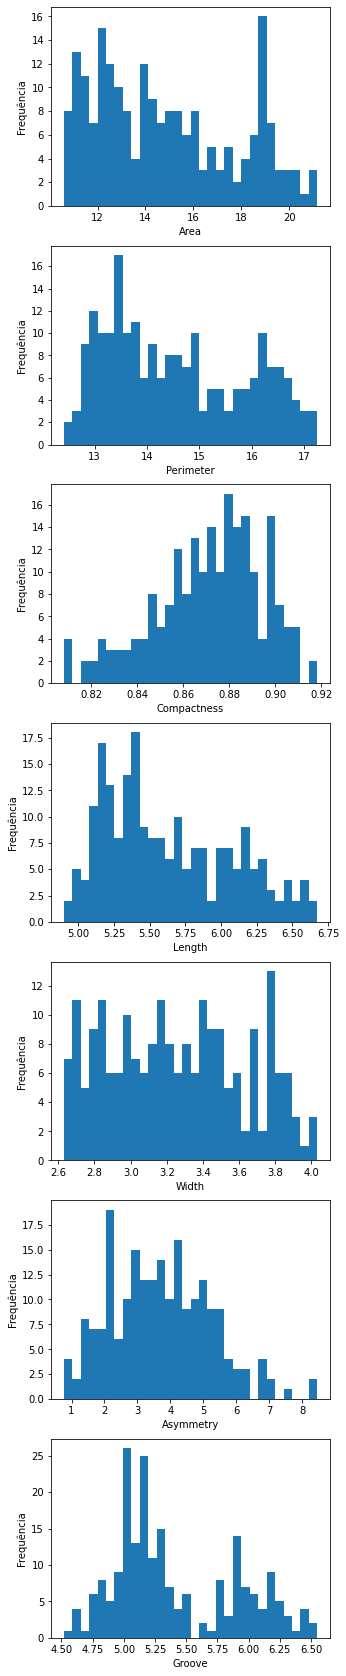

In [ ]:
from itertools import combinations
attributes_list = ["Area", "Perimeter", "Compactness", "Length", "Width", "Asymmetry", "Groove"]
att_combination = combinations(attributes_list, 2)
att_combination_list = list(att_combination)

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(5,30))
n_comb=0
for row in ax:
    row.hist(seeds_df[attributes_list[n_comb]].to_numpy(), bins=30)
    row.set(ylabel="Frequência", xlabel=attributes_list[n_comb])
    n_comb+=1


## 3.2 - Diagramas de Dispersão

Abaixo temos os gráficos de dispersão de todas as combinacões possíveis de pares de atributos do dataset. Cada cor é referente a uma espécie de semente diferente.
Temos interesse nos gráficos com uma segmentacao mais clara entre or grupos, com pouco overlap entre os espacos das espécies diferentes. Um gráfico que de destaca neste quesito é o de "Area" x "Asymmetry".


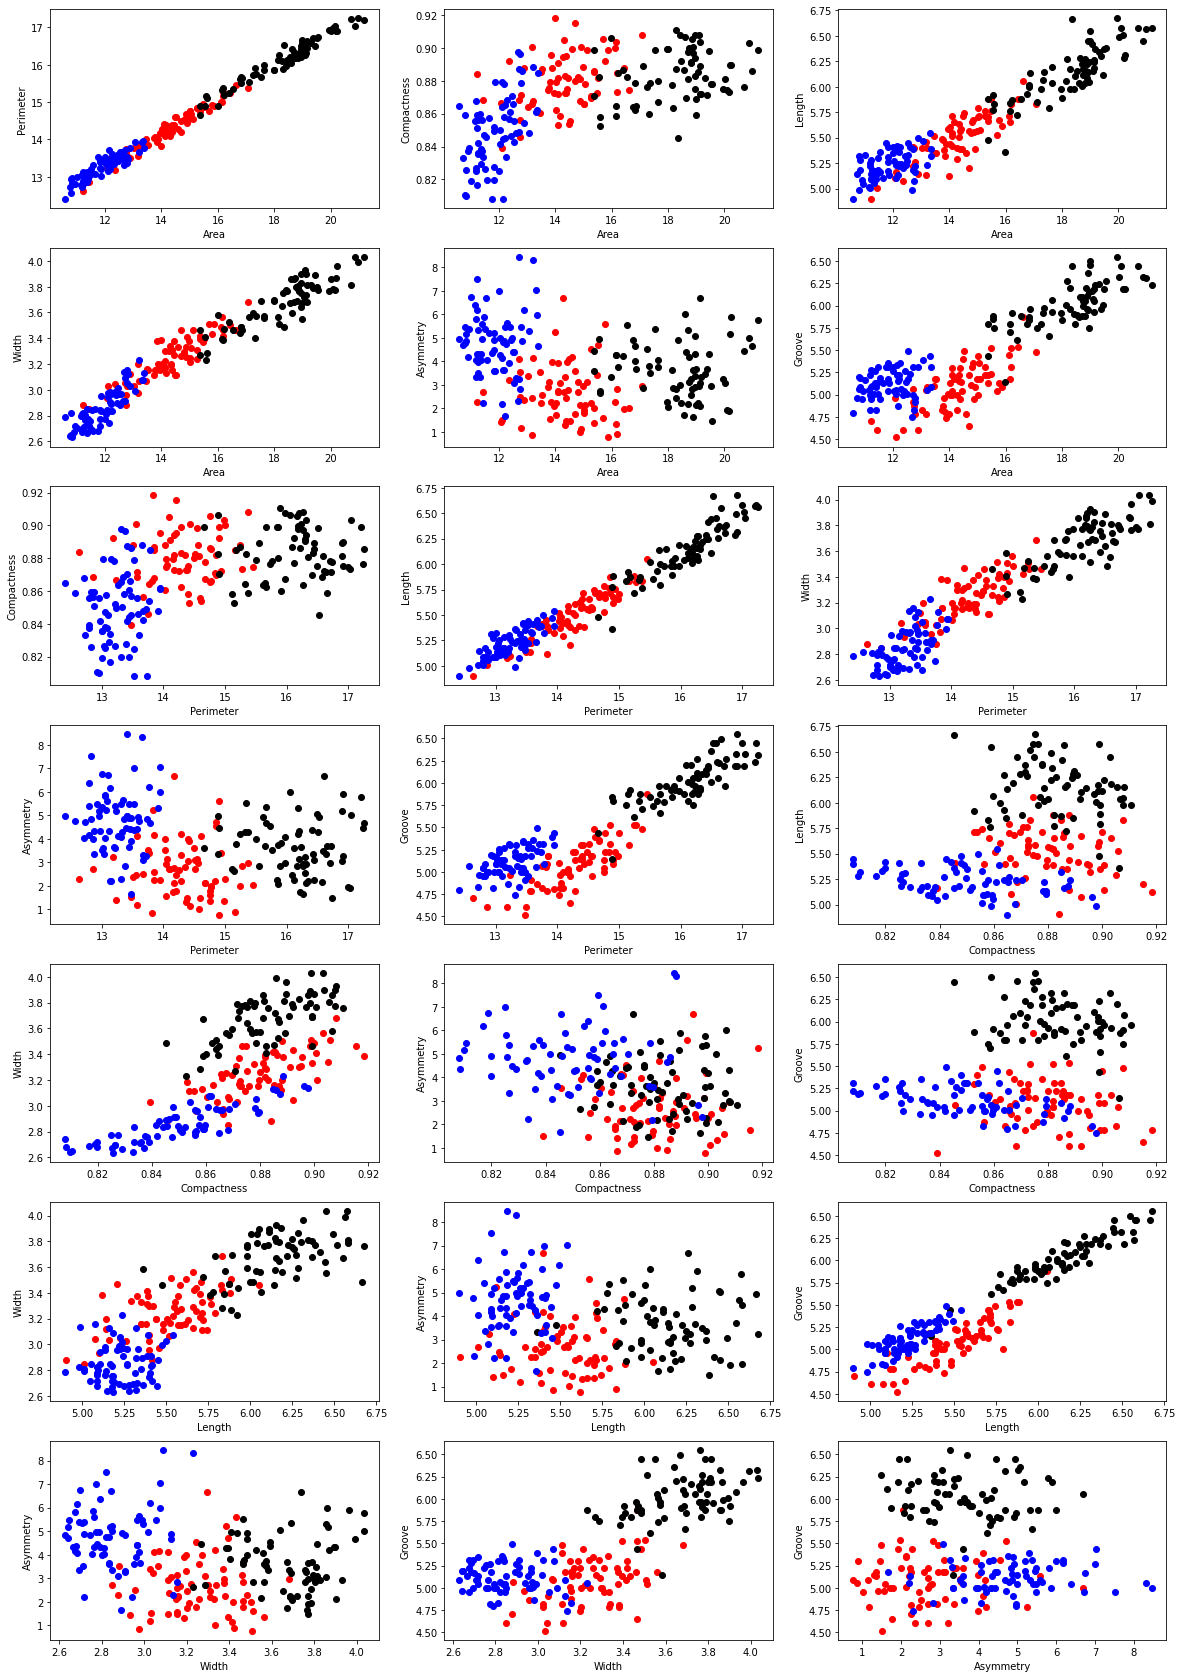

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(20,30))
n_comb = 0
for row in ax:
    for col in row:
        np_concat = np.c_[seeds_df[att_combination_list[n_comb][0]].to_numpy(), seeds_df[att_combination_list[n_comb][1]].to_numpy(), seeds_df["Class"].to_numpy()  ]
        filtered_label_validation0 = np_concat[np_concat[:, 2] == 1][:, 0:-1]
        filtered_label_validation1 = np_concat[np_concat[:, 2] == 2][:, 0:-1]
        filtered_label_validation2 = np_concat[np_concat[:, 2] == 3][:, 0:-1]

        col.scatter(filtered_label_validation0[:,0] , filtered_label_validation0[:,1] , color = 'red')
        col.scatter(filtered_label_validation1[:,0] , filtered_label_validation1[:,1] , color = 'black')
        col.scatter(filtered_label_validation2[:,0] , filtered_label_validation2[:,1] , color = 'blue')

        col.set(xlabel=att_combination_list[n_comb][0], ylabel=att_combination_list[n_comb][1])

        n_comb+=1


# 4 - Aglomeracão e Experimentacão

## 4.1 - Método de Agrupamento

Utilizou-se agrupamento hierárquico para clusterizacao. Uma vez que sabemos previamente o número de espécies, o número de clusters a serem formados foi definido como 3. 


## 4.2 - Métrica de desempenho

O "fit" no agrupamento está sendo feito com os mesmos dados que foram utilizdos no treinamento. Para medir o desempenho do agrupamento foi utilizada a funcao accuracy_score() do sklearn, que retorna a porcentagem de amostras que foram classificadas corretamente. Dizemos que a amostra foi classificada corretamente quando a classe atribuida a ela após o "fit" foi a mesma que a classe que o dataset a atribuiu.



In [ ]:

class HierarchicalClustering():
    def __init__(self, df_att):
        self.df_att = df_att

    def cluster(self, attr_names_list:"list", n_clusters:"int", affinity:"str", linkage:"str"):
        self.attr_names_list = attr_names_list
        np_concat = self.df_att[attr_names_list[0]].to_numpy()
        for attr in attr_names_list[1:]:
            np_attr = self.df_att[attr].to_numpy()
            np_concat = np.c_[np_concat, np_attr]
        np_concat = np.c_[np_concat, self.df_att["Class"].to_numpy()]
        self.np_concat = np_concat
        self.clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
        self.hier_fit = self.clustering.fit(np_concat[:,0:-1])
        self.labels = self.clustering.labels_

        self.dictionary = {0:[] ,1:[], 2:[]}

        for index in range(len(self.labels)):
            self.dictionary[self.labels[index]].append(np_concat[index, 0:2])

    def plot_fit(self, colors = ["red", "black", "blue"]):

        plt.scatter(np.array(self.dictionary[0])[:, 0] , np.array(self.dictionary[0])[:, 1] , color = colors[0])
        plt.scatter(np.array(self.dictionary[1])[:, 0] , np.array(self.dictionary[1])[:, 1] , color = colors[1])
        plt.scatter(np.array(self.dictionary[2])[:, 0] , np.array(self.dictionary[2])[:, 1] , color = colors[2])
        plt.show()

    def plot_original(self):

        filtered_label_validation0 = self.np_concat[self.np_concat[:, 2] == 1][:, 0:-1]
        filtered_label_validation1 = self.np_concat[self.np_concat[:, 2] == 2][:, 0:-1]
        filtered_label_validation2 = self.np_concat[self.np_concat[:, 2] == 3][:, 0:-1]

        plt.scatter(filtered_label_validation0[:,0] , filtered_label_validation0[:,1] , color = 'red')
        plt.scatter(filtered_label_validation1[:,0] , filtered_label_validation1[:,1] , color = 'black')
        plt.scatter(filtered_label_validation2[:,0] , filtered_label_validation2[:,1] , color = 'blue')

        plt.show()

    def plot_3d(self):
        fig = plt.figure(figsize=(12,12))
        ax = fig.add_subplot(projection=('3d'))

        filtered_label_validation0 = self.np_concat[self.np_concat[:, 3] == 1][:, 0:-1]
        filtered_label_validation1 = self.np_concat[self.np_concat[:, 3] == 2][:, 0:-1]
        filtered_label_validation2 = self.np_concat[self.np_concat[:, 3] == 3][:, 0:-1]


        ax.scatter(filtered_label_validation0[:,0] , filtered_label_validation0[:,1], filtered_label_validation0[:,2] , color = 'red')
        ax.scatter(filtered_label_validation1[:,0] , filtered_label_validation1[:,1], filtered_label_validation1[:,2] , color = 'black')
        ax.scatter(filtered_label_validation2[:,0] , filtered_label_validation2[:,1], filtered_label_validation2[:,2] , color = 'blue')

        plt.show()


    def evaluate_performance(self):
        true_labels_1 = []
        true_labels_2 = []
        true_labels_3 = []

        true_labels_4 = []
        true_labels_5 = []
        true_labels_6 = []

        for label in self.df_att["Class"].to_numpy():
            if label == 1:
                true_labels_1.append(0)
                true_labels_2.append(0)

                true_labels_3.append(1)
                true_labels_4.append(1)

                true_labels_5.append(2)
                true_labels_6.append(2)


            elif label == 2:
                true_labels_1.append(1)
                true_labels_2.append(2)

                true_labels_3.append(0)
                true_labels_4.append(2)

                true_labels_5.append(0)
                true_labels_6.append(1)

            else:
                true_labels_1.append(2)
                true_labels_2.append(1)

                true_labels_3.append(2)
                true_labels_4.append(9)

                true_labels_5.append(1)
                true_labels_6.append(0)

        true_labels_1 = np.array(true_labels_1)
        true_labels_2 = np.array(true_labels_2)
        true_labels_3 = np.array(true_labels_3)
        true_labels_4 = np.array(true_labels_4)
        true_labels_5 = np.array(true_labels_5)
        true_labels_6 = np.array(true_labels_6)

        accuracy_1 = accuracy_score(true_labels_1, self.labels, normalize=True)
        accuracy_2 = accuracy_score(true_labels_2, self.labels, normalize=True)
        accuracy_3 = accuracy_score(true_labels_3, self.labels, normalize=True)
        accuracy_4 = accuracy_score(true_labels_4, self.labels, normalize=True)
        accuracy_5 = accuracy_score(true_labels_5, self.labels, normalize=True)
        accuracy_6 = accuracy_score(true_labels_6, self.labels, normalize=True)

        accuracy = max(accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6)
        #print(self.df_att["Class"].to_numpy())
        return accuracy

## 4.3 - Desempenho em "Area" x "Asymmetry"

Conforme citado na secão 3, a combinacao de características "Area" x "Asymmetry" pareceu bastante promissora. Abaixo temos um teste de desempenho utilizando distancia euclidiana e agrupamento pelo método de Ward. A acurácia obtida foi de 91,4%, o que é um número bem expressivo.

Classificacao correta:


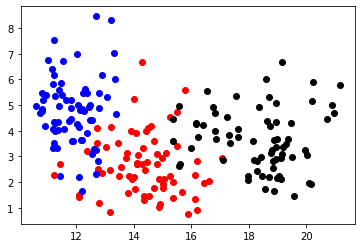

Classificacao predita:


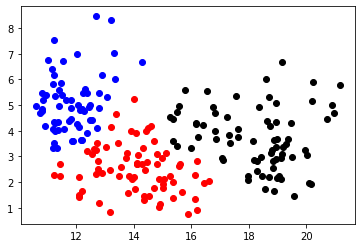

Porcentagem de amostras classificadas corretamente: 91.42857142857143 %


In [ ]:
hier_clustering = HierarchicalClustering(seeds_df)
attributes = ["Area", "Asymmetry"]
hier_clustering.cluster(attr_names_list=attributes, n_clusters=3, affinity="euclidean", linkage="ward")
print("Classificacao correta:")
hier_clustering.plot_original()
colors = ["black", "red", "blue"]
print("Classificacao predita:")
hier_clustering.plot_fit(colors)
acc = hier_clustering.evaluate_performance()
print(f"Porcentagem de amostras classificadas corretamente: {100 * acc} %")


## 4.4 - Encontrando a melhor combinacao de atributos e métodos de agrupamento

Para econtrar a melhor combinacao de atributos, método de agrupamento e cáculo de distancao, fez-se um código que testou todas as combinacoes possíveis e retornou o arranjo com o melhor desempenho. 
O resultado foi o seguinte:

In [ ]:
attributes = ["Area", "Perimeter", "Compactness", "Length", "Width", "Asymmetry", "Groove"]
all_combinations = []
for n_comb in range(1,len(attributes) + 1):
    comb_loop = combinations(attributes, n_comb)
    all_combinations = all_combinations + list(comb_loop)

affinities = ["euclidean", "l1”", "l2", "manhattan", "cosine", "precomputed"]
linkages = ["ward", "complete", "average", "single"]
hier_clustering = HierarchicalClustering(seeds_df)

max_perf = 0
max_link = []
max_aff = []
max_att = []
for attribute in all_combinations:
    for affinity in affinities:
        for linkage in linkages:
            try:
                hier_clustering.cluster(attr_names_list=attribute, n_clusters=3, affinity=affinity, linkage=linkage)
                perf = hier_clustering.evaluate_performance()
                if perf > max_perf:
                    max_perf = perf
                    max_att = attribute
                    max_aff = affinity
                    max_link = linkage
            except:
                ...

print(f"Porcentagem de amostras classificadas corretamente: {100 * max_perf} %")
print("Melhor método de agrupamento: ",max_link)
print("Melhor tipo de distancia: ",max_aff)
print("Melhor combinacao de atributos: ", max_att)    

Porcentagem de amostras classificadas corretamente: 91.9047619047619 %
Melhor método de agrupamento:  average
Melhor tipo de distancia:  euclidean
Melhor combinacao de atributos:  ('Area', 'Compactness', 'Asymmetry')


Plotando os dados com classificacao original num gráfico 3d podemos perceber que de fato existe uma segmentacao muito boa entre os clusters.

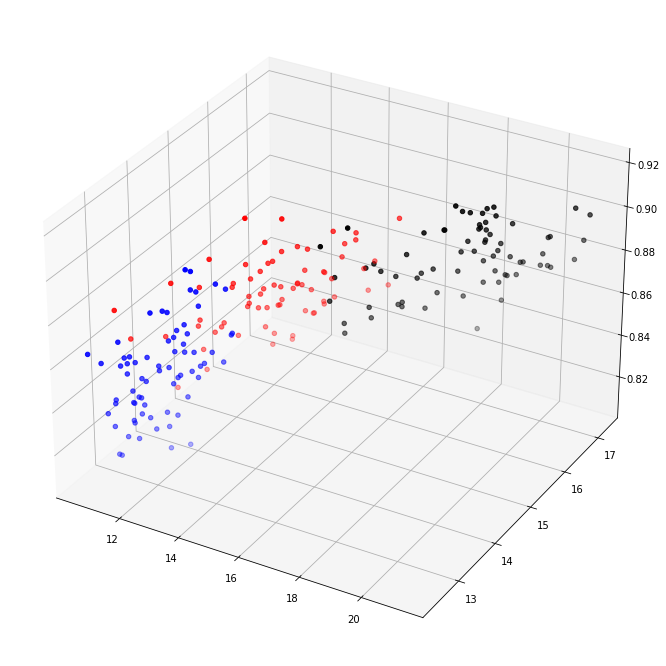

In [ ]:
hier_clustering = HierarchicalClustering(seeds_df)
attributes = ["Area", "Perimeter", "Compactness"]
hier_clustering.cluster(attr_names_list=attributes, n_clusters=3, affinity="euclidean", linkage="ward")
hier_clustering.plot_3d()


## 4.5 - Matriz de Similaridade

A matriz de similaridade do arranjo 'Area' x 'Compactness' x 'Asymmetry' foi calculada levando em consideracao a distancia euclidiana dos centroides dos clusters, que foram calculados a partir da posicao média das amostras.

In [ ]:
hier_clustering = HierarchicalClustering(seeds_df)
attributes = ['Area', 'Compactness', 'Asymmetry']
hier_clustering.cluster(attr_names_list=attributes, n_clusters=3, affinity="euclidean", linkage="average")
hier_clustering.evaluate_performance()
hier_clustering.clustering.labels_
concat = np.c_[hier_clustering.np_concat, hier_clustering.clustering.labels_]
centroid_1 = concat[concat[:,4]==0].mean(axis=0)[0:3]
centroid_2 = concat[concat[:,4]==1].mean(axis=0)[0:3]
centroid_3 = concat[concat[:,4]==2].mean(axis=0)[0:3]

def calc_dist(arr_1, arr_2):
    dist = np.sqrt(((arr_1-arr_2)**2).sum())
    return dist

calc_dist(centroid_1, centroid_1)

centroid_list = [centroid_1, centroid_2, centroid_3]

dist_matrix = []
for i in range(0, len(centroid_list)):
    dist_matrix.append([])
    for j in range(0, len(centroid_list)):
        dist_matrix[i].append(calc_dist(centroid_list[i], centroid_list[j]))
        
dist_matrix
df_dist = pd.DataFrame(dist_matrix)
df_dist

,0,1,2
0,0.000000,6.459854,4.311025
1,6.459854,0.000000,3.367746
2,4.311025,3.367746,0.000000


# Conclusao

Foi possíve predizer as espécies das sementes dos datasets com uma precisao de 91,9%, o que é um resultado muito bom considerando a simplicidade das técnicas utilizadas. 

No primeiro teste, feito com dois atributos selecionados a olho, foi possível obter uma precisao de 91,4%, que é um valor bem próximo da maior precisão possível com estas técnicas neste dataset. Isso prova que selecionar um conjunto visualmente pela segmentacao das classes no diagrama de dispersao pode ser um método efetivo num contexto de análise exploratória.